# KNN practice

This notebook is for practicing on building a KNN model for classification

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

X, Y = iris.data, iris.target

In [ ]:
X.shape
X

In [7]:
count = {}
for i in range(len(Y)):
    if Y[i] not in count.keys():
        count[Y[i]] = 1
    else:
        count[Y[i]] = count[Y[i]] + 1

count

{0: 50, 1: 50, 2: 50}

### Shuffle the dataset

In [8]:
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))

In [9]:
shuffled_x = X[shuffle]
shuffled_y = Y[shuffle]

### Divide the dataset into training and testing sets

In [10]:
train_data = shuffled_x[:100]
train_label = shuffled_y[:100]

test_data = shuffled_x[100:]
test_label = shuffled_y[100:]

### Just for EPA purpose, calculate all the pair-wise distances in the training set and draw a histogram

In [11]:
def euclidean_distance(V1, V2):
    '''This function calculates the Euclidean distance of two vectors'''
    
    sq_dist = 0
    
    for i in range(len(V1)):
        sq_dist += (V1[i] - V2[i]) ** 2
        
    return sq_dist ** 0.5

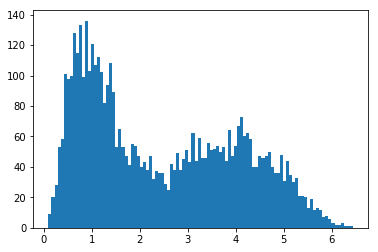

In [12]:
dist = []

for i in range(len(train_data)-1):
    for j in range(i+1, len(train_data)):
        dist.append(euclidean_distance(train_data[i], train_data[j]))

fig = plt.hist(dist,100)

### Now write our own KNN implementation with k = 1. The nearest neighbor.

In [29]:
class KNearestNeighbors():
    
    def __init__(self, metric):
        self.metric = metric
    
    def fit(self, X, y):
        self.train_data = X
        self.train_label = y
        
    def predict(self, X):
        
        predictions = []
        
        for i in range(len(X)):
            predictions.append(self.__predit_item(X[i]))
        
        return predictions
    
    def __predit_item(self, item):
        
        min_dist = 10**10
        prediction = None
        
        for i in range(len(self.train_data)):
            dist = self.metric(item, self.train_data[i])
            if dist < min_dist:
                min_dist = dist
                prediction = self.train_label[i]
        
        return prediction

In [31]:
KNN = KNearestNeighbors(euclidean_distance)

In [32]:
KNN.fit(train_data, train_label)

In [33]:
predictions = KNN.predict(test_data)

In [39]:
cor_predicts = 0
for i in range(len(predictions)):
    if predictions[i] == test_label[i]:
        cor_predicts += 1

accuracy = cor_predicts/len(predictions)
print('total: %1d  correct: %1d  accuracy: %3.2f' %(len(predictions), cor_predicts, accuracy))

total: 50  correct: 48  accuracy: 0.96
